In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline
import warnings
from scipy.stats import jarque_bera
from scipy.stats import normaltest


warnings.filterwarnings('ignore')

First, load the dataset from the weatherinszeged table from Thinkful's database.

Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weatherdata = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

In [3]:
weatherdata


,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [5]:
# humidity, windspeed, windbearing, and pressure, target tempeture
Y = weatherdata['temperature']
# X is the feature set which includes
# is_male and is_smoker variables
X = weatherdata[["humidity","windspeed","windbearing","pressure"]]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.9264381852854


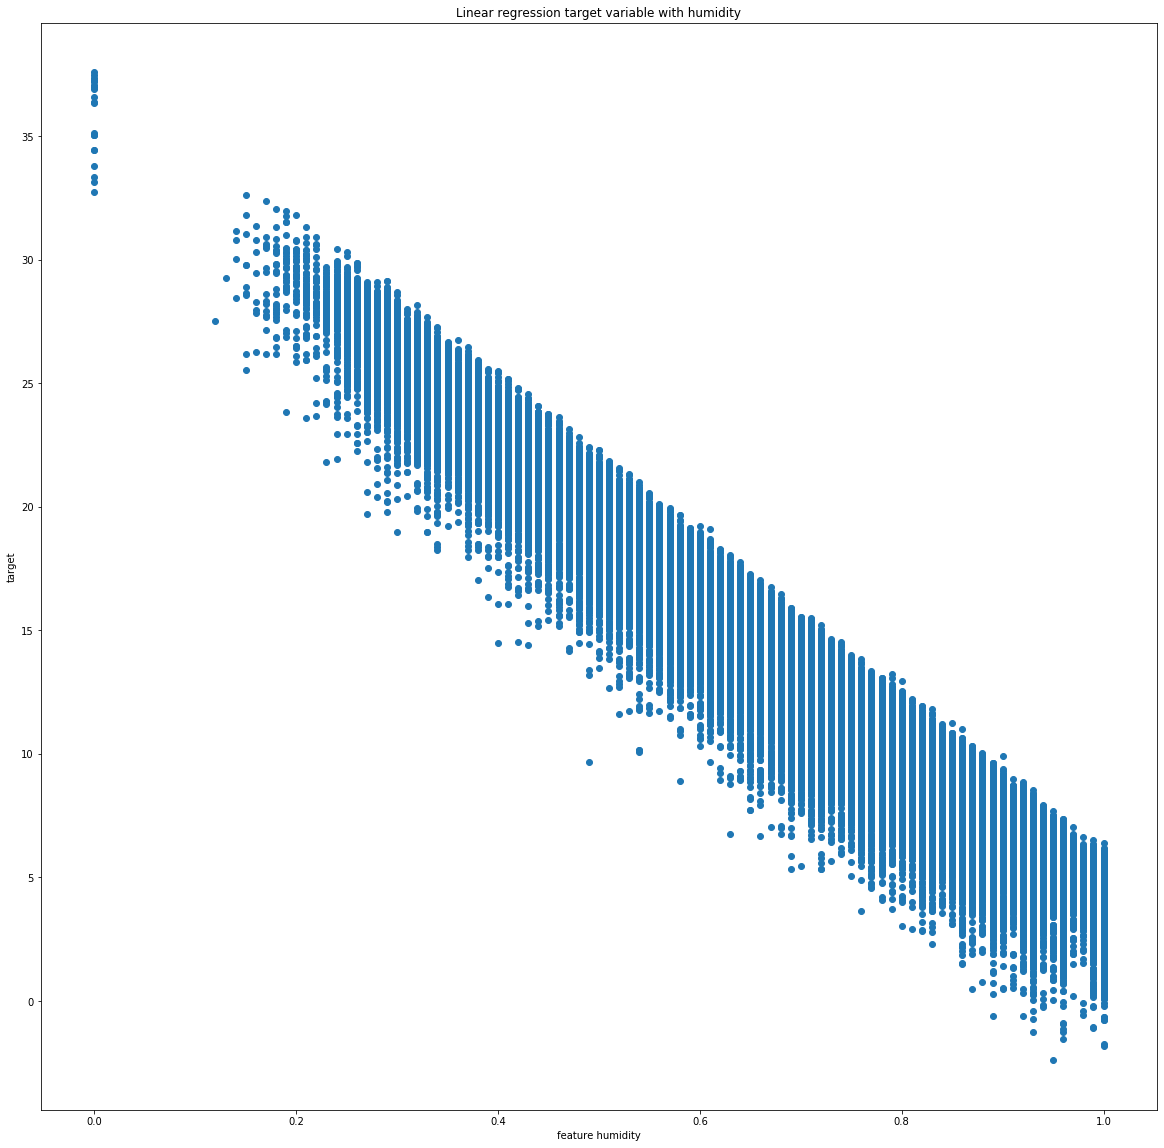

In [7]:
# check assumptions 
# Assumption one: linearity of the model in its coefficients
#target variable should be a linear function of the model's coefficients
predictions = lrm.predict(weatherdata[["humidity","windspeed","windbearing","pressure"]])
predictions

plt.figure(figsize=(20,20))
plt.scatter(weatherdata[["humidity"]], predictions)
plt.xlabel("feature humidity")
plt.ylabel("target")
plt.title('Linear regression target variable with humidity')
plt.show()
# from the plot to see, the coefficient of humidity with target variable is linear 

In [ ]:
# assumption 2 
# the error term should be zero on average

errors = Y - predictions
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

# from the result below to see, error is quite small, and I added constant noise into the regression model,
# so this result can be considered error=0

In [ ]:
#Assumption three: homoscedasticity
# Question??? how to add jitter to this scatter plot

plt.figure(figsize=(20,20))
plt.scatter(predictions, errors)
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Residual',fontsize=15)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=18)
plt.show()


In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

#The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our 
# errors are heteroscedastic.

In [ ]:
# Assumption four: low multicollinearity
plt.plot(errors)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

# from the error acf plot it's clear to see, the the autocorrelation between the errors of our target is relative high and has clear descending pattern.

In [ ]:
#Assumption six: features shouldn't be correlated with the errors

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors)) # what is np.random.normal doing for errors ???

plt.figure(figsize=(14,9))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) 
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

# from the plots to see, the distribution is not normally distributed
# and QQ plot is not normally distributed either

In [ ]:
# jarque_berra test and normality test

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

# result shows p-value = 0 so it rejects the null hypothesis, so errors are not normally ditributed